In [1]:
import numpy as np
import pandas as pd
import risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
erk.bond_price(5,100,.05,12,0.03)

0    109.275393
dtype: float64

In [8]:
rates , zc_prices = erk.cir(10,500,b = 0.03, r_0=0.03)

In [10]:
#time 0 and the prices of r = 0.03
erk.bond_price(5,100,.05,12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [12]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.031801,0.028903,0.032616
2,0.035167,0.026769,0.030757
3,0.032482,0.029184,0.035346
4,0.031780,0.033827,0.032867


In [17]:
#time 1, variating time
erk.bond_price(5,100,.05,12, rates.iloc[1][[1,2,3]])

1    108.402797
2    109.810949
3    108.010187
dtype: float64

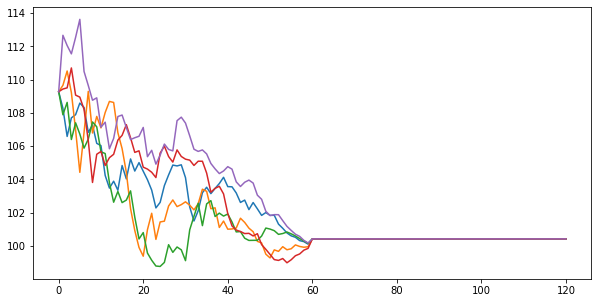

In [15]:
sm = erk.bond_price(5,100,.05,12, rates[[1,2,3,4,5]]).plot(legend = False, figsize = (10,5))


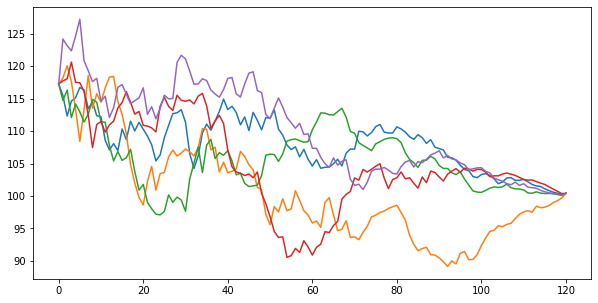

In [16]:
sm = erk.bond_price(10,100,.05,12, rates[[1,2,3,4,5]]).plot(legend = False, figsize = (10,5))

In [19]:
prices = erk.bond_price(10,100,.05,12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,115.461,118.172,114.712,117.733,124.183
2,112.316,120.065,116.311,118.044,123.161
3,114.623,117.645,112.071,120.633,122.361
4,115.147,113.319,114.172,117.514,124.649
...,...,...,...,...,...
116,100.833,98.5335,100.396,101.413,100.497
117,100.582,98.9926,100.353,101.056,100.369
118,100.417,99.2775,100.269,100.728,100.215
119,100.2,99.6868,100.128,100.361,100.1


In [20]:
br = prices.pct_change().dropna()
erk.annualize_rets(br,12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [23]:
p = erk.bond_price(10,100,0.05,12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100,0.05,12)

In [25]:
erk.annualize_rets(btr, 12)

1    0.031244
2    0.034946
3    0.032421
4    0.032788
dtype: float64

In [26]:
price_10 = erk.bond_price(10,100,0.05,12, rates)

In [28]:
price_30 = erk.bond_price(30,100,0.05,12, rates)

In [29]:
price_30.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
116,182.847,140.063,59.6294,116.924,180.001,121.838,110.589,193.382,187.704,150.297,...,121.75,132.402,76.4023,166.28,156.413,152.02,150.819,167.596,143.91,184.548
117,180.507,136.541,62.1909,120.433,179.23,121.506,110.708,194.172,186.765,146.726,...,113.162,136.199,77.5477,164.466,159.928,160.371,146.613,169.563,157.261,179.665
118,182.287,139.788,60.3644,123.711,182.785,118.388,109.682,193.332,185.332,151.71,...,110.644,134.096,74.9631,167.207,160.471,163.313,143.518,164.992,158.841,181.354
119,181.083,137.607,64.3332,122.301,181.594,116.952,107.437,192.821,183.915,154.395,...,122.92,146.928,71.0026,169.151,160.435,163.015,147.114,166.138,159.92,182.402
120,179.867,141.951,67.9811,128.283,180.519,116.391,110.557,191.313,185.757,155.303,...,120.939,143.687,71.0819,165.694,162.99,162.166,152.53,163.955,162.125,183.098


In [32]:
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)

rets_bonds =  0.6*rets_10 + .4*rets_30

In [36]:
rets_bonds

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.0395417,-0.0185856,0.0156908,-0.0279114,0.0100878,0.094926,0.00964206,-0.0411187,0.036173,0.0360432,...,-0.0364852,0.0245207,0.0308116,-0.0830971,-0.0384311,-0.0399013,-0.018153,0.0135536,-0.0135583,0.00800674
2,0.00579572,-0.0357911,0.0283201,0.0248789,0.00804336,-0.00837558,0.0328509,0.04103,-0.0228469,-0.0181195,...,0.0244482,0.00435929,-0.0215824,0.0370004,-0.0118793,-0.0263759,0.0230694,0.00584625,0.0291396,-0.013318
3,0.00872189,0.0347058,-0.0260532,-0.0493114,0.0374801,-0.00576534,-0.0111046,0.00914964,0.000456891,0.00164921,...,-0.0343491,0.0248008,0.031866,0.019669,0.00393504,0.0070732,0.027324,0.00722259,0.0506916,0.0112431
4,0.000270454,0.0109258,-0.0501702,0.0320913,-0.0346437,0.0330658,0.00480095,-0.0173084,-0.0103835,0.0578134,...,-0.00962741,0.00640251,-0.0107353,0.00390828,-0.0366196,-0.00542949,-0.0122716,-0.0236894,-0.0287502,0.0128517
5,0.0125387,0.0246876,-0.0587712,-0.0116559,0.00319795,0.0363653,-0.00270048,-0.0167906,-0.00330936,0.00576799,...,-0.0182517,0.0409593,0.0220518,-0.0135539,0.0291632,-0.0224639,0.0047203,0.00725214,-0.0392435,0.0191998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.00392513,-0.00649237,-0.00352066,0.019606,-0.000688648,-0.00142647,0.0250404,0.00410091,-0.000717838,0.0227026,...,0.0121246,-0.0163694,-0.0052188,0.00104637,0.00599598,-0.00631214,0.00513798,0.0104917,0.00916628,-0.00672385
117,-0.00399519,-0.0078861,0.0253104,0.0156639,-0.000434954,0.002002,0.00406585,0.0026939,-0.000906906,-0.0076383,...,-0.0259042,0.0144879,0.0119705,-0.00281304,0.0111515,0.0245907,-0.00935001,0.00644014,0.0403523,-0.00963657
118,0.00530704,0.012237,-0.00481554,0.0142634,0.00939126,-0.0073227,-0.000163273,-0.000768708,-0.0019691,0.0160388,...,-0.00557096,-0.0037174,-0.00793433,0.00848007,0.00320795,0.00927742,-0.00637184,-0.00939998,0.00598812,0.00514013
119,-0.00141947,-0.00385736,0.0340515,-0.00156404,-0.00139453,-0.00163619,-0.00460637,-7.13052e-05,-0.00191114,0.00919703,...,0.0483914,0.0412422,-0.0154561,0.00630931,0.00171095,0.000986838,0.0124238,0.00447903,0.00458884,0.00359493


In [41]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized vol,Skewness,Kurtosis,Cornish-Fisher Value at Risk (5%),Historic CVar (5%),Sharpe Ratio,Annualized Sharp,Max Drawdown
0,0.036464,0.003951,-0.06594,2.563211,-0.00109,-0.000666,1.592375,0.0,0.0


In [42]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu = 0.07, sigma = 0.15)
price_eq.shape

(121, 500)

In [45]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [47]:
rets = .7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis = 'columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized vol,Skewness,Kurtosis,Cornish-Fisher Value at Risk (5%),Historic CVar (5%),Sharpe Ratio,Annualized Sharp,Max Drawdown
0,0.059334,0.004923,0.266516,2.775206,-0.002591,-0.002233,5.799769,0.0,0.0
